In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

In [2]:
path = 'Financial_inclusion_dataset.csv'
data = pd.read_csv(path)
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# Instructions
* Install the necessary packages
* Import you data and perform basic data exploration phase
* Display general information about the dataset
* Create a pandas profiling reports to gain insights into the dataset
* Handle Missing and corrupted values
* Remove duplicates, if they exist
* Handle outliers, if they exist
* Encode categorical features
* Based on the previous data exploration train and test a machine learning classifier
* Create a streamlit application (locally)
* Add input fields for your features and a validation button at the end of the form
* Import your ML model into the streamlit application and start making predictions given the provided features values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [5]:
data.describe(include="all")

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524.000000,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016.975939,NaN,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847371,NaN,NaN,NaN,NaN,2.227613,16.520569,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [5]:
# splittingn into categorical and numerical columns
cat = data.select_dtypes('object')
num = data.select_dtypes('number')
print(cat.columns)
print(num.columns)

Index(['country', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')
Index(['year', 'household_size', 'age_of_respondent'], dtype='object')


In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


<Axes: xlabel='household_size'>

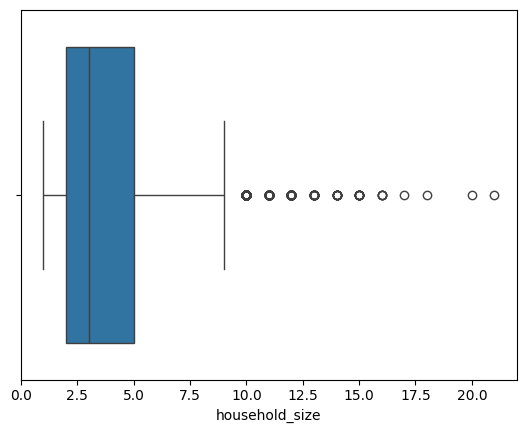

In [8]:
sns.boxplot(data,x='household_size')

<Axes: xlabel='age_of_respondent'>

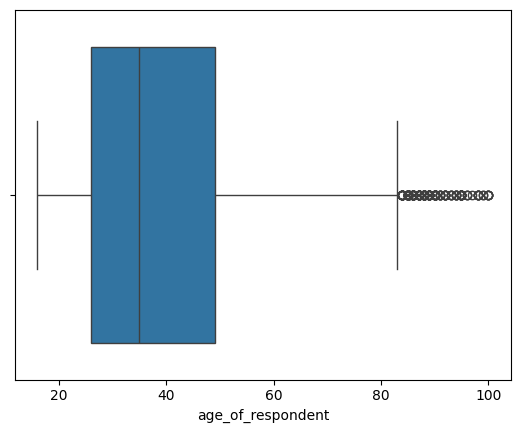

In [12]:
sns.boxplot(data,x='age_of_respondent')

In [9]:
new_data = data.loc[(data['age_of_respondent']<82) & (data['household_size']<10)]

<Axes: xlabel='household_size'>

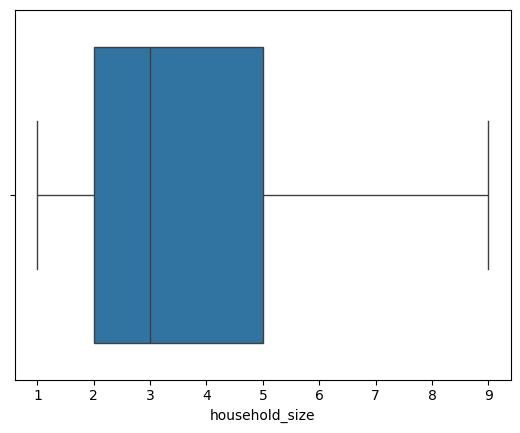

In [10]:
sns.boxplot(new_data, x='household_size')

<Axes: xlabel='age_of_respondent'>

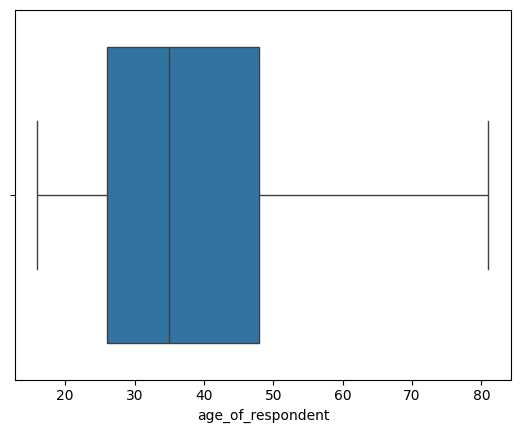

In [21]:
sns.boxplot(new_data, x='age_of_respondent')

In [11]:
encoder = LabelEncoder()
for i in cat.columns:
    new_data[i] = encoder.fit_transform(new_data[i])

C:\Users\Macks\AppData\Local\Temp\ipykernel_968\3727793131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[i] = encoder.fit_transform(new_data[i])
C:\Users\Macks\AppData\Local\Temp\ipykernel_968\3727793131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[i] = encoder.fit_transform(new_data[i])
C:\Users\Macks\AppData\Local\Temp\ipykernel_968\3727793131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [12]:
new_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,0,1,3,24,0,5,2,3,9
1,0,2018,1111,0,0,0,5,70,0,1,4,0,4
2,0,2018,2222,1,1,1,5,26,1,3,3,5,9
3,0,2018,3333,0,0,1,5,34,0,1,2,2,3
4,0,2018,4444,0,1,0,8,26,1,0,3,2,5


In [13]:
new_data['country'].value_counts()

country
1    8534
2    6515
0    5853
3    1926
Name: count, dtype: int64

In [14]:
# Splitting into X and Y variables
x = new_data.drop(['uniqueid', 'bank_account'], axis = 1)
y = new_data['bank_account']
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [48]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
report = classification_report(y_test,y_pred)

In [49]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [52]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3936
           1       0.57      0.39      0.46       630

    accuracy                           0.87      4566
   macro avg       0.74      0.67      0.70      4566
weighted avg       0.86      0.87      0.86      4566



In [53]:
joblib.dump(classifier,'rf_classifier')

['rf_classifier']

In [39]:
len(x.columns)

11

# Test

In [50]:
data.loc[(data['age_of_respondent']<82) & (data['household_size']<10)]['bank_account'].value_counts()

bank_account
No     19584
Yes     3244
Name: count, dtype: int64

In [51]:
new_data['bank_account'].value_counts()

bank_account
0    19584
1     3244
Name: count, dtype: int64

In [35]:
relationship = {'Head of Household': 1,
                    'Spouse': 5,
                    'Child': 0,
                    'Parent': 4,
                    'Other relative': 3,
                    'Other non-relatives': 2}

In [37]:
ls = [x for x in relationship.keys()]

In [38]:
ls

['Head of Household',
 'Spouse',
 'Child',
 'Parent',
 'Other relative',
 'Other non-relatives']

In [39]:
relationship[ls[1]]

5

In [54]:
from expresso_app import add


In [55]:
add(3,4)

7